In [1]:
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()

In [1]:
import os
import sys
from osgeo import ogr
# os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/isasi/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/isasi/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
covid_gpkg = "../covid-pt-latest.gpkg" + "|layername=concelho"
concelho = QgsVectorLayer(covid_gpkg, "Concelhos", "ogr")
if not concelho.isValid():
    print("Layer failed to load!")
else:
    QgsProject.instance().addMapLayer(concelho)
    print("Layer loaded")

Layer loaded


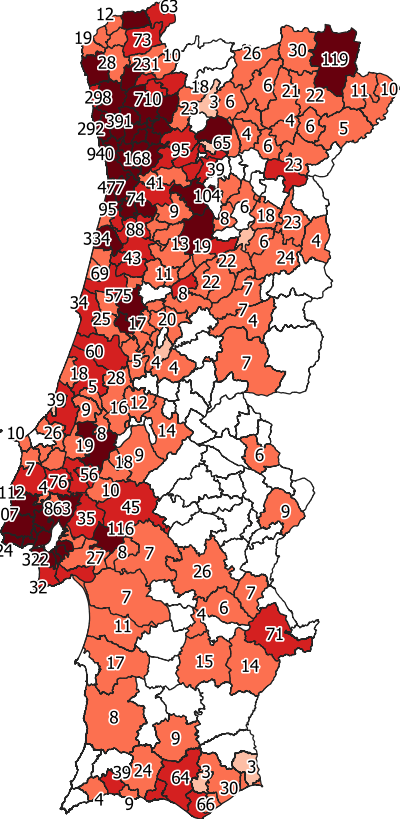

In [4]:
from IPython.display import Image

xt = concelho.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [5]:
os.getcwd()

'C:\\Users\\isasi\\OneDrive\\Desktop\\4ºAno - Mestrado\\2º Semestre\\Sistemas de Informação Geográfica\\Epidemiologia\\Exercices'

In [6]:
estilo = os.path.join(os.getcwd(), "estilos/estilo2.qml")
res = concelho.loadNamedStyle( estilo, True)
res

('Style not found in database', False)

In [ ]:
xt = concelho.extent()
print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf2 = QBuffer()
imgbuf2.open( QIODevice.ReadWrite )
image.save( imgbuf2,"PNG" )
Image( imgbuf2.data() )